# Data Augmentation Models Training

In [1]:
"""
Supervised learning models are trained.

@author: Juan Felipe Latorre Gil - jflatorreg@unal.edu.co
"""

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pylab as pl
import seaborn as sns
plt.style.use(['ggplot','seaborn-paper'])
from time import process_time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

In [2]:
"""
def log_reg(param_grid, X_train, y_train, X_test, y_test):
    clf_log_reg = GridSearchCV(LogisticRegression(solver= 'liblinear'), param_grid=param_grid_log_reg, 
                               verbose=0,return_train_score=True, n_jobs=-1, cv=5, iid = False) 
    clf_log_reg.fit(X_train, y_train)
    y_pred_log_reg = clf_log_reg.predict(X_test)
    score_micro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_log_reg, average='weighted')
    
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]



"""

"\ndef log_reg(param_grid, X_train, y_train, X_test, y_test):\n    clf_log_reg = GridSearchCV(LogisticRegression(solver= 'liblinear'), param_grid=param_grid_log_reg, \n                               verbose=0,return_train_score=True, n_jobs=-1, cv=5, iid = False) \n    clf_log_reg.fit(X_train, y_train)\n    y_pred_log_reg = clf_log_reg.predict(X_test)\n    score_micro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='micro')\n    score_macro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='macro')\n    score_weighted = precision_recall_fscore_support(y_test, y_pred_log_reg, average='weighted')\n    \n    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]\n\n\n\n"

In [3]:
def log_reg(X_train, y_train, X_test, y_test):
    clf_log_reg = LogisticRegression(solver= 'liblinear', C=1)
    clf_log_reg.fit(X_train, y_train)
    y_pred_log_reg = clf_log_reg.predict(X_test)
    score_micro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_log_reg, average='weighted')
    
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [4]:
def SVM_rbf_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, verbose=0, iid = False,
                               return_train_score=True, cv=5)
    clf_svm_rbf.fit(X_train, y_train)    
    y_pred_svm_rbf = clf_svm_rbf.predict(X_test)
    score_micro = precision_recall_fscore_support(y_test, y_pred_svm_rbf, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_svm_rbf, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_svm_rbf, average='weighted')
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [5]:
def random_forests_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid=param_grid_rf, verbose=0, iid = False,
                          return_train_score=True, n_jobs=-1, cv=5)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    score_micro = precision_recall_fscore_support(y_test, y_pred_rf, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_rf, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [6]:
def mlp_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid=param_grid_mlp, verbose=0, iid = False,
                           return_train_score=True, n_jobs=-1, cv=5)
    clf_mlp.fit(X_train, y_train)
    y_pred_mlp = clf_mlp.predict(X_test)
    score_micro = precision_recall_fscore_support(y_test, y_pred_mlp, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_mlp, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_mlp, average='weighted')
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [7]:
X_train_low_set_1 = np.load('./data_augmentation/X_train_low_set_1.npy')
X_test_low_set_1 = np.load('./data_augmentation/X_test_low_set_1.npy')
y_train_low_set_1 = np.load('./data_augmentation/y_train_low_set_1.npy')
y_test_low_set_1 = np.load('./data_augmentation/y_test_low_set_1.npy')

X_train_med_set_1 = np.load('./data_augmentation/X_train_med_set_1.npy')
X_test_med_set_1 = np.load('./data_augmentation/X_test_med_set_1.npy')
y_train_med_set_1 = np.load('./data_augmentation/y_train_med_set_1.npy')
y_test_med_set_1 = np.load('./data_augmentation/y_test_med_set_1.npy')

X_train_high_set_1 = np.load('./data_augmentation/X_train_high_set_1.npy')
X_test_high_set_1 = np.load('./data_augmentation/X_test_high_set_1.npy')
y_train_high_set_1 = np.load('./data_augmentation/y_train_high_set_1.npy')
y_test_high_set_1 = np.load('./data_augmentation/y_test_high_set_1.npy')

In [8]:
X_train_low_set_2 = np.load('./data_augmentation/X_train_low_set_2.npy')
X_test_low_set_2 = np.load('./data_augmentation/X_test_low_set_2.npy')
y_train_low_set_2 = np.load('./data_augmentation/y_train_low_set_2.npy')
y_test_low_set_2 = np.load('./data_augmentation/y_test_low_set_2.npy')

X_train_med_set_2 = np.load('./data_augmentation/X_train_med_set_2.npy')
X_test_med_set_2 = np.load('./data_augmentation/X_test_med_set_2.npy')
y_train_med_set_2 = np.load('./data_augmentation/y_train_med_set_2.npy')
y_test_med_set_2 = np.load('./data_augmentation/y_test_med_set_2.npy')

X_train_high_set_2 = np.load('./data_augmentation/X_train_high_set_2.npy')
X_test_high_set_2 = np.load('./data_augmentation/X_test_high_set_2.npy')
y_train_high_set_2 = np.load('./data_augmentation/y_train_high_set_2.npy')
y_test_high_set_2 = np.load('./data_augmentation/y_test_high_set_2.npy')

In [9]:
X_train_low_set_3 = np.load('./data_augmentation/X_train_low_set_3.npy')
X_test_low_set_3 = np.load('./data_augmentation/X_test_low_set_3.npy')
y_train_low_set_3 = np.load('./data_augmentation/y_train_low_set_3.npy')
y_test_low_set_3 = np.load('./data_augmentation/y_test_low_set_3.npy')

X_train_med_set_3 = np.load('./data_augmentation/X_train_med_set_3.npy')
X_test_med_set_3 = np.load('./data_augmentation/X_test_med_set_3.npy')
y_train_med_set_3 = np.load('./data_augmentation/y_train_med_set_3.npy')
y_test_med_set_3 = np.load('./data_augmentation/y_test_med_set_3.npy')

X_train_high_set_3 = np.load('./data_augmentation/X_train_high_set_3.npy')
X_test_high_set_3 = np.load('./data_augmentation/X_test_high_set_3.npy')
y_train_high_set_3 = np.load('./data_augmentation/y_train_high_set_3.npy')
y_test_high_set_3 = np.load('./data_augmentation/y_test_high_set_3.npy')

In [10]:
X_train_low_cl = np.load('./data_augmentation/X_train_low.npy')
X_test_low_cl = np.load('./data_augmentation/X_test_low.npy')
y_train_low_cl = np.load('./data_augmentation/y_train_low.npy')
y_test_low_cl = np.load('./data_augmentation/y_test_low.npy')

X_train_med_cl = np.load('./data_augmentation/X_train_med.npy')
X_test_med_cl = np.load('./data_augmentation/X_test_med.npy')
y_train_med_cl = np.load('./data_augmentation/y_train_med.npy')
y_test_med_cl = np.load('./data_augmentation/y_test_med.npy')

X_train_high_cl = np.load('./data_augmentation/X_train_high.npy')
X_test_high_cl = np.load('./data_augmentation/X_test_high.npy')
y_train_high_cl = np.load('./data_augmentation/y_train_high.npy')
y_test_high_cl = np.load('./data_augmentation/y_test_high.npy')

In [11]:
X_train_low = np.load('./results/X_train_low.npy')
X_test_low = np.load('./results/X_test_low.npy')
y_train_low = np.load('./results/y_train_low.npy')
y_test_low = np.load('./results/y_test_low.npy')

X_train_med = np.load('./results/X_train_med.npy')
X_test_med = np.load('./results/X_test_med.npy')
y_train_med = np.load('./results/y_train_med.npy')
y_test_med = np.load('./results/y_test_med.npy')

X_train_high = np.load('./results/X_train_high.npy')
X_test_high = np.load('./results/X_test_high.npy')
y_train_high = np.load('./results/y_train_high.npy')
y_test_high = np.load('./results/y_test_high.npy')

In [12]:
#X_train_low_aug = np.concatenate((X_train_low_cl,X_train_low_set_1[:73],X_train_low_set_2[:73],X_train_low_set_3[:73]))

#y_train_low_aug = np.concatenate((y_train_low_cl,y_train_low_set_1[:73],y_train_low_set_2[:73],y_train_low_set_3[:73]))

In [13]:
#X_train_med_aug = np.concatenate((X_train_med_cl,X_train_med_set_1[:73],X_train_med_set_2[:73],X_train_med_set_3[:73]))

#y_train_med_aug = np.concatenate((y_train_med_cl,y_train_med_set_1[:73],y_train_med_set_2[:73],y_train_med_set_3[:73]))

In [14]:
#X_train_high_aug = np.concatenate((X_train_high_cl,X_train_high_set_1[:73],X_train_high_set_2[:73],X_train_high_set_3[:73]))

#y_train_high_aug = np.concatenate((y_train_high_cl,y_train_high_set_1[:73],y_train_high_set_2[:73],y_train_high_set_3[:73]))

In [15]:
X_train_low_aug = np.concatenate((X_train_low_cl,X_train_low_set_1,X_train_low_set_2,X_train_low_set_3))

y_train_low_aug = np.concatenate((y_train_low_cl,y_train_low_set_1,y_train_low_set_2,y_train_low_set_3))

In [16]:
X_train_med_aug = np.concatenate((X_train_med_cl,X_train_med_set_1,X_train_med_set_2,X_train_med_set_3))

y_train_med_aug = np.concatenate((y_train_med_cl,y_train_med_set_1,y_train_med_set_2,y_train_med_set_3))

In [17]:
X_train_high_aug = np.concatenate((X_train_high_cl,X_train_high_set_1,X_train_high_set_2,X_train_high_set_3))

y_train_high_aug = np.concatenate((y_train_high_cl,y_train_high_set_1,y_train_high_set_2,y_train_high_set_3))

In [18]:
len(y_train_high_set_1)

229

In [19]:
np.unique(y_train_high_aug)

array([0., 1.])

In [20]:
y_train_low_set_1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
unique, counts = np.unique(y_train_high_set_3, return_counts=True)
dict(zip(unique, counts))

{0.0: 156, 1.0: 73}

In [22]:
y_train_low_set_1[:73]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [23]:
step = 1

In [24]:
grid_log_reg = [i for i in range(1, 11, 1)]
param_grid_log_reg = {'C': [np.round((0.1*i), decimals =2) for i in grid_log_reg]}
print('Parameters:', param_grid_log_reg)

Parameters: {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


In [25]:
Precision_micro_low_LR = np.array([])
Precision_macro_low_LR = np.array([])
Precision_weighted_low_LR = np.array([])

Recall_micro_low_LR = np.array([])
Recall_macro_low_LR = np.array([])
Recall_weighted_low_LR = np.array([])

F1_micro_low_LR = np.array([])
F1_macro_low_LR = np.array([])
F1_weighted_low_LR = np.array([])
Sample_Num_low_LR = np.array([])

for i in range(587, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = log_reg(X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_LR = np.append(Precision_micro_low_LR, pr_micro)
    Precision_macro_low_LR = np.append(Precision_macro_low_LR, pr_macro)
    Precision_weighted_low_LR = np.append(Precision_weighted_low_LR, pr_weighted)    
    
    Recall_micro_low_LR = np.append(Recall_micro_low_LR, re_micro)
    Recall_macro_low_LR = np.append(Recall_macro_low_LR, re_macro)
    Recall_weighted_low_LR = np.append(Recall_weighted_low_LR, re_weighted)    
    
    F1_micro_low_LR = np.append(F1_micro_low_LR, f1_micro)
    F1_macro_low_LR = np.append(F1_macro_low_LR, f1_macro)
    F1_weighted_low_LR = np.append(F1_weighted_low_LR, f1_weighted)
    
    Sample_Num_low_LR = np.append(Sample_Num_low_LR, len(y_train_low_aug[:i]))

In [26]:
df_plot_low_LR = pd.DataFrame()
df_plot_low_LR['Sample Number'] = Sample_Num_low_LR

df_plot_low_LR['Precision Micro'] = Precision_micro_low_LR
df_plot_low_LR['Precision Macro'] = Precision_macro_low_LR
df_plot_low_LR['Precision Weighted'] = Precision_weighted_low_LR

df_plot_low_LR['Recall Micro'] = Recall_micro_low_LR
df_plot_low_LR['Recall Macro'] = Recall_macro_low_LR
df_plot_low_LR['Recall Weighted'] = Recall_weighted_low_LR

df_plot_low_LR['F1 Micro'] = F1_micro_low_LR
df_plot_low_LR['F1 Macro'] = F1_macro_low_LR
df_plot_low_LR['F1 Weighted'] = F1_weighted_low_LR

df_plot_low_LR['Resolution'] = 'Low'

In [27]:
Precision_micro_med_LR = np.array([])
Precision_macro_med_LR = np.array([])
Precision_weighted_med_LR = np.array([])

Recall_micro_med_LR = np.array([])
Recall_macro_med_LR = np.array([])
Recall_weighted_med_LR = np.array([])

F1_micro_med_LR = np.array([])
F1_macro_med_LR = np.array([])
F1_weighted_med_LR = np.array([])
Sample_Num_med_LR = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = log_reg(X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_LR = np.append(Precision_micro_med_LR, pr_micro)
    Precision_macro_med_LR = np.append(Precision_macro_med_LR, pr_macro)
    Precision_weighted_med_LR = np.append(Precision_weighted_med_LR, pr_weighted)    
    
    Recall_micro_med_LR = np.append(Recall_micro_med_LR, re_micro)
    Recall_macro_med_LR = np.append(Recall_macro_med_LR, re_macro)
    Recall_weighted_med_LR = np.append(Recall_weighted_med_LR, re_weighted)    
    
    F1_micro_med_LR = np.append(F1_micro_med_LR, f1_micro)
    F1_macro_med_LR = np.append(F1_macro_med_LR, f1_macro)
    F1_weighted_med_LR = np.append(F1_weighted_med_LR, f1_weighted)
    
    Sample_Num_med_LR = np.append(Sample_Num_med_LR, len(y_train_med_aug[:i]))

In [28]:
df_plot_med_LR = pd.DataFrame()
df_plot_med_LR['Sample Number'] = Sample_Num_med_LR

df_plot_med_LR['Precision Micro'] = Precision_micro_med_LR
df_plot_med_LR['Precision Macro'] = Precision_macro_med_LR
df_plot_med_LR['Precision Weighted'] = Precision_weighted_med_LR

df_plot_med_LR['Recall Micro'] = Recall_micro_med_LR
df_plot_med_LR['Recall Macro'] = Recall_macro_med_LR
df_plot_med_LR['Recall Weighted'] = Recall_weighted_med_LR

df_plot_med_LR['F1 Micro'] = F1_micro_med_LR
df_plot_med_LR['F1 Macro'] = F1_macro_med_LR
df_plot_med_LR['F1 Weighted'] = F1_weighted_med_LR

df_plot_med_LR['Resolution'] = 'Med'

In [29]:
Precision_micro_high_LR = np.array([])
Precision_macro_high_LR = np.array([])
Precision_weighted_high_LR = np.array([])

Recall_micro_high_LR = np.array([])
Recall_macro_high_LR = np.array([])
Recall_weighted_high_LR = np.array([])

F1_micro_high_LR = np.array([])
F1_macro_high_LR = np.array([])
F1_weighted_high_LR = np.array([])
Sample_Num_high_LR = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = log_reg(X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_LR = np.append(Precision_micro_high_LR, pr_micro)
    Precision_macro_high_LR = np.append(Precision_macro_high_LR, pr_macro)
    Precision_weighted_high_LR = np.append(Precision_weighted_high_LR, pr_weighted)    
    
    Recall_micro_high_LR = np.append(Recall_micro_high_LR, re_micro)
    Recall_macro_high_LR = np.append(Recall_macro_high_LR, re_macro)
    Recall_weighted_high_LR = np.append(Recall_weighted_high_LR, re_weighted)    
    
    F1_micro_high_LR = np.append(F1_micro_high_LR, f1_micro)
    F1_macro_high_LR = np.append(F1_macro_high_LR, f1_macro)
    F1_weighted_high_LR = np.append(F1_weighted_high_LR, f1_weighted)
    
    Sample_Num_high_LR = np.append(Sample_Num_high_LR, len(y_train_high_aug[:i]))

In [30]:
df_plot_high_LR = pd.DataFrame()
df_plot_high_LR['Sample Number'] = Sample_Num_high_LR

df_plot_high_LR['Precision Micro'] = Precision_micro_high_LR
df_plot_high_LR['Precision Macro'] = Precision_macro_high_LR
df_plot_high_LR['Precision Weighted'] = Precision_weighted_high_LR

df_plot_high_LR['Recall Micro'] = Recall_micro_high_LR
df_plot_high_LR['Recall Macro'] = Recall_macro_high_LR
df_plot_high_LR['Recall Weighted'] = Recall_weighted_high_LR

df_plot_high_LR['F1 Micro'] = F1_micro_high_LR
df_plot_high_LR['F1 Macro'] = F1_macro_high_LR
df_plot_high_LR['F1 Weighted'] = F1_weighted_high_LR

df_plot_high_LR['Resolution'] = 'High'

In [31]:
df_plot_LR = df_plot_low_LR.append(df_plot_med_LR, ignore_index=True)
df_plot_LR = df_plot_LR.append(df_plot_high_LR, ignore_index=True)

In [32]:
df_plot_LR.head()

,Sample Number,Precision Micro,Precision Macro,Precision Weighted,Recall Micro,Recall Macro,Recall Weighted,F1 Micro,F1 Macro,F1 Weighted,Resolution
0,587.0,0.900901,0.900901,0.900901,0.888415,0.89011,0.889252,0.901134,0.900901,0.901009,Low
1,588.0,0.900901,0.900901,0.900901,0.888415,0.89011,0.889252,0.901134,0.900901,0.901009,Low
2,589.0,0.900901,0.900901,0.900901,0.888415,0.89011,0.889252,0.901134,0.900901,0.901009,Low
3,590.0,0.900901,0.900901,0.900901,0.888415,0.89011,0.889252,0.901134,0.900901,0.901009,Low
4,591.0,0.900901,0.900901,0.900901,0.888415,0.89011,0.889252,0.901134,0.900901,0.901009,Low


In [33]:
size = (8, 7)
a4_dims = size
palette_3 = sns.color_palette("mako_r",3)

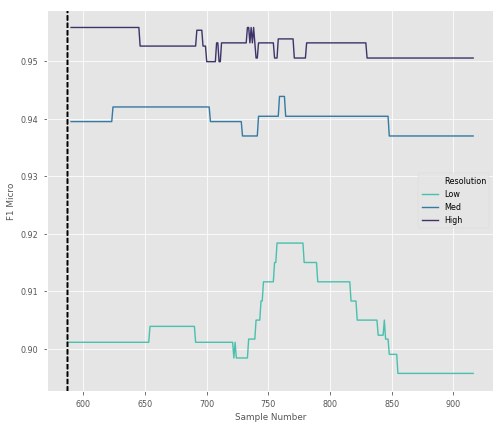

In [36]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
#plt.axvline(229, 0, 1, linestyle='--', color='black')
plt.axvline(587, 0, 1, linestyle='--', color='black')
plt.axvline(587, 0, 1, linestyle='--', color='black')
plt.axvline(587, 0, 1, linestyle='--', color='black')
plt.show()

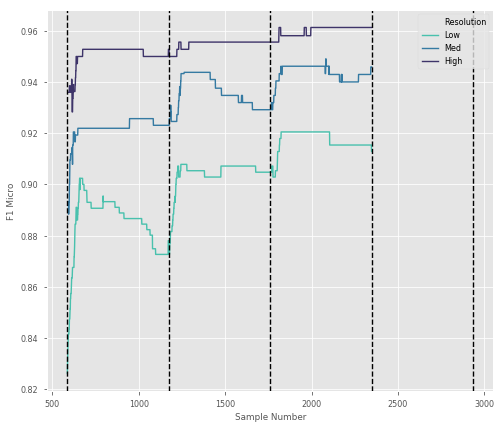

In [128]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.axvline(587, 0, 1, linestyle='--', color='black')
plt.axvline(587+587, 0, 1, linestyle='--', color='black')
plt.axvline(587+587*2, 0, 1, linestyle='--', color='black')
plt.axvline(587+587*3, 0, 1, linestyle='--', color='black')
plt.show()

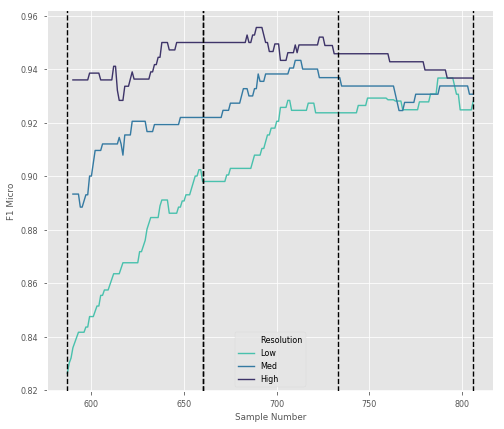

In [31]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.axvline(587, 0, 1, linestyle='--', color='black')
plt.axvline(587+73, 0, 1, linestyle='--', color='black')
plt.axvline(587+73, 0, 1, linestyle='--', color='black')
plt.axvline(587+73*2, 0, 1, linestyle='--', color='black')
plt.axvline(587+73*3, 0, 1, linestyle='--', color='black')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize=a4_dims)
#ax = sns.lineplot(x="Thresholds", y="Score", hue="Resolution", style="Score Type",
#                  palette=palette_3, legend="full", data=df_plot)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
#plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="Precision Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
path_LR = './data_augmentation/results/df_LR.csv'
df_plot_LR.to_csv(path_LR, index=True)

In [ ]:
grid_C = [i for i in range(-5, 7, 1)]
grid_gamma = [i for i in range(0, 11, 1)]
param_grid_svm_rbf = {'C': [2**i for i in grid_C], 
                      'gamma': np.round([0.1*i for i in grid_gamma], decimals=2)}
print('Parameters:', param_grid_svm_rbf)

In [ ]:
Precision_micro_low_SVC = np.array([])
Precision_macro_low_SVC = np.array([])
Precision_weighted_low_SVC = np.array([])

Recall_micro_low_SVC = np.array([])
Recall_macro_low_SVC = np.array([])
Recall_weighted_low_SVC = np.array([])

F1_micro_low_SVC = np.array([])
F1_macro_low_SVC = np.array([])
F1_weighted_low_SVC = np.array([])
Sample_Num_low_SVC = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = SVM_rbf_clf(param_grid_svm_rbf, X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_SVC = np.append(Precision_micro_low_SVC, pr_micro)
    Precision_macro_low_SVC = np.append(Precision_macro_low_SVC, pr_macro)
    Precision_weighted_low_SVC = np.append(Precision_weighted_low_SVC, pr_weighted)    
    
    Recall_micro_low_SVC = np.append(Recall_micro_low_SVC, re_micro)
    Recall_macro_low_SVC = np.append(Recall_macro_low_SVC, re_macro)
    Recall_weighted_low_SVC = np.append(Recall_weighted_low_SVC, re_weighted)    
    
    F1_micro_low_SVC = np.append(F1_micro_low_SVC, f1_micro)
    F1_macro_low_SVC = np.append(F1_macro_low_SVC, f1_macro)
    F1_weighted_low_SVC = np.append(F1_weighted_low_SVC, f1_weighted)
    
    Sample_Num_low_SVC = np.append(Sample_Num_low_SVC, len(y_train_low_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_low_SVC = pd.DataFrame()
df_plot_low_SVC['Sample Number'] = Sample_Num_low_SVC

df_plot_low_SVC['Precision Micro'] = Precision_micro_low_SVC
df_plot_low_SVC['Precision Macro'] = Precision_macro_low_SVC
df_plot_low_SVC['Precision Weighted'] = Precision_weighted_low_SVC

df_plot_low_SVC['Recall Micro'] = Recall_micro_low_SVC
df_plot_low_SVC['Recall Macro'] = Recall_macro_low_SVC
df_plot_low_SVC['Recall Weighted'] = Recall_weighted_low_SVC

df_plot_low_SVC['F1 Micro'] = F1_micro_low_SVC
df_plot_low_SVC['F1 Macro'] = F1_macro_low_SVC
df_plot_low_SVC['F1 Weighted'] = F1_weighted_low_SVC

df_plot_low_SVC['Resolution'] = 'Low'

In [ ]:
Precision_micro_med_SVC = np.array([])
Precision_macro_med_SVC = np.array([])
Precision_weighted_med_SVC = np.array([])

Recall_micro_med_SVC = np.array([])
Recall_macro_med_SVC = np.array([])
Recall_weighted_med_SVC = np.array([])

F1_micro_med_SVC = np.array([])
F1_macro_med_SVC = np.array([])
F1_weighted_med_SVC = np.array([])
Sample_Num_med_SVC = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = SVM_rbf_clf(param_grid_svm_rbf, X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_SVC = np.append(Precision_micro_med_SVC, pr_micro)
    Precision_macro_med_SVC = np.append(Precision_macro_med_SVC, pr_macro)
    Precision_weighted_med_SVC = np.append(Precision_weighted_med_SVC, pr_weighted)    
    
    Recall_micro_med_SVC = np.append(Recall_micro_med_SVC, re_micro)
    Recall_macro_med_SVC = np.append(Recall_macro_med_SVC, re_macro)
    Recall_weighted_med_SVC = np.append(Recall_weighted_med_SVC, re_weighted)    
    
    F1_micro_med_SVC = np.append(F1_micro_med_SVC, f1_micro)
    F1_macro_med_SVC = np.append(F1_macro_med_SVC, f1_macro)
    F1_weighted_med_SVC = np.append(F1_weighted_med_SVC, f1_weighted)
    
    Sample_Num_med_SVC = np.append(Sample_Num_med_SVC, len(y_train_med_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_med_SVC = pd.DataFrame()
df_plot_med_SVC['Sample Number'] = Sample_Num_med_SVC

df_plot_med_SVC['Precision Micro'] = Precision_micro_med_SVC
df_plot_med_SVC['Precision Macro'] = Precision_macro_med_SVC
df_plot_med_SVC['Precision Weighted'] = Precision_weighted_med_SVC

df_plot_med_SVC['Recall Micro'] = Recall_micro_med_SVC
df_plot_med_SVC['Recall Macro'] = Recall_macro_med_SVC
df_plot_med_SVC['Recall Weighted'] = Recall_weighted_med_SVC

df_plot_med_SVC['F1 Micro'] = F1_micro_med_SVC
df_plot_med_SVC['F1 Macro'] = F1_macro_med_SVC
df_plot_med_SVC['F1 Weighted'] = F1_weighted_med_SVC

df_plot_med_SVC['Resolution'] = 'Med'

In [ ]:
Precision_micro_high_SVC = np.array([])
Precision_macro_high_SVC = np.array([])
Precision_weighted_high_SVC = np.array([])

Recall_micro_high_SVC = np.array([])
Recall_macro_high_SVC = np.array([])
Recall_weighted_high_SVC = np.array([])

F1_micro_high_SVC = np.array([])
F1_macro_high_SVC = np.array([])
F1_weighted_high_SVC = np.array([])
Sample_Num_high_SVC = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = SVM_rbf_clf(param_grid_svm_rbf, X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_SVC = np.append(Precision_micro_high_SVC, pr_micro)
    Precision_macro_high_SVC = np.append(Precision_macro_high_SVC, pr_macro)
    Precision_weighted_high_SVC = np.append(Precision_weighted_high_SVC, pr_weighted)    
    
    Recall_micro_high_SVC = np.append(Recall_micro_high_SVC, re_micro)
    Recall_macro_high_SVC = np.append(Recall_macro_high_SVC, re_macro)
    Recall_weighted_high_SVC = np.append(Recall_weighted_high_SVC, re_weighted)    
    
    F1_micro_high_SVC = np.append(F1_micro_high_SVC, f1_micro)
    F1_macro_high_SVC = np.append(F1_macro_high_SVC, f1_macro)
    F1_weighted_high_SVC = np.append(F1_weighted_high_SVC, f1_weighted)
    
    Sample_Num_high_SVC = np.append(Sample_Num_high_SVC, len(y_train_high_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_high_SVC = pd.DataFrame()
df_plot_high_SVC['Sample Number'] = Sample_Num_high_SVC

df_plot_high_SVC['Precision Micro'] = Precision_micro_high_SVC
df_plot_high_SVC['Precision Macro'] = Precision_macro_high_SVC
df_plot_high_SVC['Precision Weighted'] = Precision_weighted_high_SVC

df_plot_high_SVC['Recall Micro'] = Recall_micro_high_SVC
df_plot_high_SVC['Recall Macro'] = Recall_macro_high_SVC
df_plot_high_SVC['Recall Weighted'] = Recall_weighted_high_SVC

df_plot_high_SVC['F1 Micro'] = F1_micro_high_SVC
df_plot_high_SVC['F1 Macro'] = F1_macro_high_SVC
df_plot_high_SVC['F1 Weighted'] = F1_weighted_high_SVC

df_plot_high_SVC['Resolution'] = 'High'

In [ ]:
df_plot_SVC = df_plot_low_SVC.append(df_plot_med_SVC, ignore_index=True)
df_plot_SVC = df_plot_SVC.append(df_plot_high_SVC, ignore_index=True)

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_SVC)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="Precision Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_SVC)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
path_SVC = './data_augmentation/results/df_SVC.csv'
df_plot_SVC.to_csv(path_SVC, index=True)

In [ ]:
ii = 0
for i in range(590, 2361, 15):
    ii = ii +1
    
print(ii,'        ', i)    

In [ ]:
max_features_params_rf = [np.round(10**-1 * i, decimals=2) for i in range(1, 11, 1)]
param_grid_rf = {'n_estimators': [2**i for i in range(2, 12, 1)], 'max_features': max_features_params_rf}
print('Parameters:', param_grid_rf)

In [ ]:
Precision_micro_low_RF = np.array([])
Precision_macro_low_RF = np.array([])
Precision_weighted_low_RF = np.array([])

Recall_micro_low_RF = np.array([])
Recall_macro_low_RF = np.array([])
Recall_weighted_low_RF = np.array([])

F1_micro_low_RF = np.array([])
F1_macro_low_RF = np.array([])
F1_weighted_low_RF = np.array([])
Sample_Num_low_RF = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = random_forests_clf(param_grid_rf, X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_RF = np.append(Precision_micro_low_RF, pr_micro)
    Precision_macro_low_RF = np.append(Precision_macro_low_RF, pr_macro)
    Precision_weighted_low_RF = np.append(Precision_weighted_low_RF, pr_weighted)    
    
    Recall_micro_low_RF = np.append(Recall_micro_low_RF, re_micro)
    Recall_macro_low_RF = np.append(Recall_macro_low_RF, re_macro)
    Recall_weighted_low_RF = np.append(Recall_weighted_low_RF, re_weighted)    
    
    F1_micro_low_RF = np.append(F1_micro_low_RF, f1_micro)
    F1_macro_low_RF = np.append(F1_macro_low_RF, f1_macro)
    F1_weighted_low_RF = np.append(F1_weighted_low_RF, f1_weighted)
    
    Sample_Num_low_RF = np.append(Sample_Num_low_RF, len(y_train_low_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_low_RF = pd.DataFrame()
df_plot_low_RF['Sample Number'] = Sample_Num_low_RF

df_plot_low_RF['Precision Micro'] = Precision_micro_low_RF
df_plot_low_RF['Precision Macro'] = Precision_macro_low_RF
df_plot_low_RF['Precision Weighted'] = Precision_weighted_low_RF

df_plot_low_RF['Recall Micro'] = Recall_micro_low_RF
df_plot_low_RF['Recall Macro'] = Recall_macro_low_RF
df_plot_low_RF['Recall Weighted'] = Recall_weighted_low_RF

df_plot_low_RF['F1 Micro'] = F1_micro_low_RF
df_plot_low_RF['F1 Macro'] = F1_macro_low_RF
df_plot_low_RF['F1 Weighted'] = F1_weighted_low_RF

df_plot_low_RF['Resolution'] = 'Low'

In [ ]:
Precision_micro_med_RF = np.array([])
Precision_macro_med_RF = np.array([])
Precision_weighted_med_RF = np.array([])

Recall_micro_med_RF = np.array([])
Recall_macro_med_RF = np.array([])
Recall_weighted_med_RF = np.array([])

F1_micro_med_RF = np.array([])
F1_macro_med_RF = np.array([])
F1_weighted_med_RF = np.array([])
Sample_Num_med_RF = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = random_forests_clf(param_grid_rf, X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_RF = np.append(Precision_micro_med_RF, pr_micro)
    Precision_macro_med_RF = np.append(Precision_macro_med_RF, pr_macro)
    Precision_weighted_med_RF = np.append(Precision_weighted_med_RF, pr_weighted)    
    
    Recall_micro_med_RF = np.append(Recall_micro_med_RF, re_micro)
    Recall_macro_med_RF = np.append(Recall_macro_med_RF, re_macro)
    Recall_weighted_med_RF = np.append(Recall_weighted_med_RF, re_weighted)    
    
    F1_micro_med_RF = np.append(F1_micro_med_RF, f1_micro)
    F1_macro_med_RF = np.append(F1_macro_med_RF, f1_macro)
    F1_weighted_med_RF = np.append(F1_weighted_med_RF, f1_weighted)
    
    Sample_Num_med_RF = np.append(Sample_Num_med_RF, len(y_train_med_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_med_RF = pd.DataFrame()
df_plot_med_RF['Sample Number'] = Sample_Num_med_RF

df_plot_med_RF['Precision Micro'] = Precision_micro_med_RF
df_plot_med_RF['Precision Macro'] = Precision_macro_med_RF
df_plot_med_RF['Precision Weighted'] = Precision_weighted_med_RF

df_plot_med_RF['Recall Micro'] = Recall_micro_med_RF
df_plot_med_RF['Recall Macro'] = Recall_macro_med_RF
df_plot_med_RF['Recall Weighted'] = Recall_weighted_med_RF

df_plot_med_RF['F1 Micro'] = F1_micro_med_RF
df_plot_med_RF['F1 Macro'] = F1_macro_med_RF
df_plot_med_RF['F1 Weighted'] = F1_weighted_med_RF

df_plot_med_RF['Resolution'] = 'Med'

In [ ]:
Precision_micro_high_RF = np.array([])
Precision_macro_high_RF = np.array([])
Precision_weighted_high_RF = np.array([])

Recall_micro_high_RF = np.array([])
Recall_macro_high_RF = np.array([])
Recall_weighted_high_RF = np.array([])

F1_micro_high_RF = np.array([])
F1_macro_high_RF = np.array([])
F1_weighted_high_RF = np.array([])
Sample_Num_high_RF = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = random_forests_clf(param_grid_rf, X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_RF = np.append(Precision_micro_high_RF, pr_micro)
    Precision_macro_high_RF = np.append(Precision_macro_high_RF, pr_macro)
    Precision_weighted_high_RF = np.append(Precision_weighted_high_RF, pr_weighted)    
    
    Recall_micro_high_RF = np.append(Recall_micro_high_RF, re_micro)
    Recall_macro_high_RF = np.append(Recall_macro_high_RF, re_macro)
    Recall_weighted_high_RF = np.append(Recall_weighted_high_RF, re_weighted)    
    
    F1_micro_high_RF = np.append(F1_micro_high_RF, f1_micro)
    F1_macro_high_RF = np.append(F1_macro_high_RF, f1_macro)
    F1_weighted_high_RF = np.append(F1_weighted_high_RF, f1_weighted)
    
    Sample_Num_high_RF = np.append(Sample_Num_high_RF, len(y_train_high_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_high_RF = pd.DataFrame()
df_plot_high_RF['Sample Number'] = Sample_Num_high_RF

df_plot_high_RF['Precision Micro'] = Precision_micro_high_RF
df_plot_high_RF['Precision Macro'] = Precision_macro_high_RF
df_plot_high_RF['Precision Weighted'] = Precision_weighted_high_RF

df_plot_high_RF['Recall Micro'] = Recall_micro_high_RF
df_plot_high_RF['Recall Macro'] = Recall_macro_high_RF
df_plot_high_RF['Recall Weighted'] = Recall_weighted_high_RF

df_plot_high_RF['F1 Micro'] = F1_micro_high_RF
df_plot_high_RF['F1 Macro'] = F1_macro_high_RF
df_plot_high_RF['F1 Weighted'] = F1_weighted_high_RF

df_plot_high_RF['Resolution'] = 'High'

In [ ]:
df_plot_RF = df_plot_low_RF.append(df_plot_med_RF, ignore_index=True)
df_plot_RF = df_plot_RF.append(df_plot_high_RF, ignore_index=True)

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_RF)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
path_RF = './data_augmentation/results/df_RF.csv'
df_plot_RF.to_csv(path_RF, index=True)

In [ ]:
param_grid_mlp = {'alpha': [np.round(10**-1/4 * i, decimals=2) for i in range(1, 11, 1)], 
                  'hidden_layer_sizes': [2**i for i in range(2, 12, 1)]}
print('Parameters:', param_grid_mlp)

In [ ]:
Precision_micro_low_MLP = np.array([])
Precision_macro_low_MLP = np.array([])
Precision_weighted_low_MLP = np.array([])

Recall_micro_low_MLP = np.array([])
Recall_macro_low_MLP = np.array([])
Recall_weighted_low_MLP = np.array([])

F1_micro_low_MLP = np.array([])
F1_macro_low_MLP = np.array([])
F1_weighted_low_MLP = np.array([])
Sample_Num_low_MLP = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = mlp_clf(param_grid_mlp, X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_MLP = np.append(Precision_micro_low_MLP, pr_micro)
    Precision_macro_low_MLP = np.append(Precision_macro_low_MLP, pr_macro)
    Precision_weighted_low_MLP = np.append(Precision_weighted_low_MLP, pr_weighted)    
    
    Recall_micro_low_MLP = np.append(Recall_micro_low_MLP, re_micro)
    Recall_macro_low_MLP = np.append(Recall_macro_low_MLP, re_macro)
    Recall_weighted_low_MLP = np.append(Recall_weighted_low_MLP, re_weighted)    
    
    F1_micro_low_MLP = np.append(F1_micro_low_MLP, f1_micro)
    F1_macro_low_MLP = np.append(F1_macro_low_MLP, f1_macro)
    F1_weighted_low_MLP = np.append(F1_weighted_low_MLP, f1_weighted)
    
    Sample_Num_low_MLP = np.append(Sample_Num_low_MLP, len(y_train_low_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_low_MLP = pd.DataFrame()
df_plot_low_MLP['Sample Number'] = Sample_Num_low_MLP

df_plot_low_MLP['Precision Micro'] = Precision_micro_low_MLP
df_plot_low_MLP['Precision Macro'] = Precision_macro_low_MLP
df_plot_low_MLP['Precision Weighted'] = Precision_weighted_low_MLP

df_plot_low_MLP['Recall Micro'] = Recall_micro_low_MLP
df_plot_low_MLP['Recall Macro'] = Recall_macro_low_MLP
df_plot_low_MLP['Recall Weighted'] = Recall_weighted_low_MLP

df_plot_low_MLP['F1 Micro'] = F1_micro_low_MLP
df_plot_low_MLP['F1 Macro'] = F1_macro_low_MLP
df_plot_low_MLP['F1 Weighted'] = F1_weighted_low_MLP

df_plot_low_MLP['Resolution'] = 'Low'

In [ ]:
Precision_micro_med_MLP = np.array([])
Precision_macro_med_MLP = np.array([])
Precision_weighted_med_MLP = np.array([])

Recall_micro_med_MLP = np.array([])
Recall_macro_med_MLP = np.array([])
Recall_weighted_med_MLP = np.array([])

F1_micro_med_MLP = np.array([])
F1_macro_med_MLP = np.array([])
F1_weighted_med_MLP = np.array([])
Sample_Num_med_MLP = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = mlp_clf(param_grid_mlp, X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_MLP = np.append(Precision_micro_med_MLP, pr_micro)
    Precision_macro_med_MLP = np.append(Precision_macro_med_MLP, pr_macro)
    Precision_weighted_med_MLP = np.append(Precision_weighted_med_MLP, pr_weighted)    
    
    Recall_micro_med_MLP = np.append(Recall_micro_med_MLP, re_micro)
    Recall_macro_med_MLP = np.append(Recall_macro_med_MLP, re_macro)
    Recall_weighted_med_MLP = np.append(Recall_weighted_med_MLP, re_weighted)    
    
    F1_micro_med_MLP = np.append(F1_micro_med_MLP, f1_micro)
    F1_macro_med_MLP = np.append(F1_macro_med_MLP, f1_macro)
    F1_weighted_med_MLP = np.append(F1_weighted_med_MLP, f1_weighted)
    
    Sample_Num_med_MLP = np.append(Sample_Num_med_MLP, len(y_train_med_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_Med_MLP = pd.DataFrame()
df_plot_Med_MLP['Sample Number'] = Sample_Num_Med_MLP

df_plot_Med_MLP['Precision Micro'] = Precision_micro_Med_MLP
df_plot_Med_MLP['Precision Macro'] = Precision_macro_Med_MLP
df_plot_Med_MLP['Precision Weighted'] = Precision_weighted_Med_MLP

df_plot_Med_MLP['Recall Micro'] = Recall_micro_Med_MLP
df_plot_Med_MLP['Recall Macro'] = Recall_macro_Med_MLP
df_plot_Med_MLP['Recall Weighted'] = Recall_weighted_Med_MLP

df_plot_Med_MLP['F1 Micro'] = F1_micro_Med_MLP
df_plot_Med_MLP['F1 Macro'] = F1_macro_Med_MLP
df_plot_Med_MLP['F1 Weighted'] = F1_weighted_Med_MLP

df_plot_Med_MLP['Resolution'] = 'Med'

In [ ]:
Precision_micro_high_MLP = np.array([])
Precision_macro_high_MLP = np.array([])
Precision_weighted_high_MLP = np.array([])

Recall_micro_high_MLP = np.array([])
Recall_macro_high_MLP = np.array([])
Recall_weighted_high_MLP = np.array([])

F1_micro_high_MLP = np.array([])
F1_macro_high_MLP = np.array([])
F1_weighted_high_MLP = np.array([])
Sample_Num_high_MLP = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = mlp_clf(param_grid_mlp, X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_MLP = np.append(Precision_micro_high_MLP, pr_micro)
    Precision_macro_high_MLP = np.append(Precision_macro_high_MLP, pr_macro)
    Precision_weighted_high_MLP = np.append(Precision_weighted_high_MLP, pr_weighted)    
    
    Recall_micro_high_MLP = np.append(Recall_micro_high_MLP, re_micro)
    Recall_macro_high_MLP = np.append(Recall_macro_high_MLP, re_macro)
    Recall_weighted_high_MLP = np.append(Recall_weighted_high_MLP, re_weighted)    
    
    F1_micro_high_MLP = np.append(F1_micro_high_MLP, f1_micro)
    F1_macro_high_MLP = np.append(F1_macro_high_MLP, f1_macro)
    F1_weighted_high_MLP = np.append(F1_weighted_high_MLP, f1_weighted)
    
    Sample_Num_high_MLP = np.append(Sample_Num_high_MLP, len(y_train_high_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_high_MLP = pd.DataFrame()
df_plot_high_MLP['Sample Number'] = Sample_Num_high_MLP

df_plot_high_MLP['Precision Micro'] = Precision_micro_high_MLP
df_plot_high_MLP['Precision Macro'] = Precision_macro_high_MLP
df_plot_high_MLP['Precision Weighted'] = Precision_weighted_high_MLP

df_plot_high_MLP['Recall Micro'] = Recall_micro_high_MLP
df_plot_high_MLP['Recall Macro'] = Recall_macro_high_MLP
df_plot_high_MLP['Recall Weighted'] = Recall_weighted_high_MLP

df_plot_high_MLP['F1 Micro'] = F1_micro_high_MLP
df_plot_high_MLP['F1 Macro'] = F1_macro_high_MLP
df_plot_high_MLP['F1 Weighted'] = F1_weighted_high_MLP

df_plot_high_MLP['Resolution'] = 'High'

In [ ]:
df_plot_MLP = df_plot_low_MLP.append(df_plot_med_MLP, ignore_index=True)
df_plot_MLP = df_plot_MLP.append(df_plot_high_MLP, ignore_index=True)

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_MLP)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
path_MLP = './data_augmentation/results/df_MLP.csv'
df_plot_MLP.to_csv(path_MLP, index=True)